<a href="https://colab.research.google.com/github/Akr164/Dogs_Cats_kaggle/blob/main/CatVsDogPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:04<00:00, 243MB/s]
100% 1.06G/1.06G [00:04<00:00, 239MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.layers import BatchNormalization, Dropout

# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)


# normalize
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [4]:
# create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3),padding='valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size = (3, 3),padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size = (3, 3),padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation = 'sigmoid'))

Epoch 1/10
625/625 [==============================] - 83s 116ms/step - loss: 1.0961 - accuracy: 0.6148 - val_loss: 0.6199 - val_accuracy: 0.6544
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5300 - accuracy: 0.7357 - val_loss: 0.5558 - val_accuracy: 0.7180
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4776 - accuracy: 0.7822 - val_loss: 0.4211 - val_accuracy: 0.8118
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3878 - accuracy: 0.8290 - val_loss: 0.5882 - val_accuracy: 0.7476
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3234 - accuracy: 0.8586 - val_loss: 0.4776 - val_accuracy: 0.7996
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2471 - accuracy: 0.9006 - val_loss: 0.5688 - val_accuracy: 0.7924
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1739 - accuracy: 0.9305 - val_loss: 0.5995 - val_ac

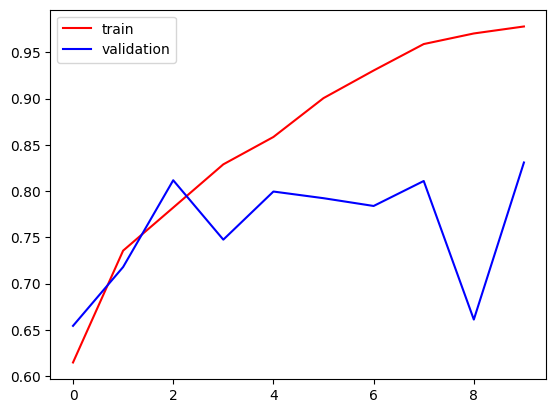

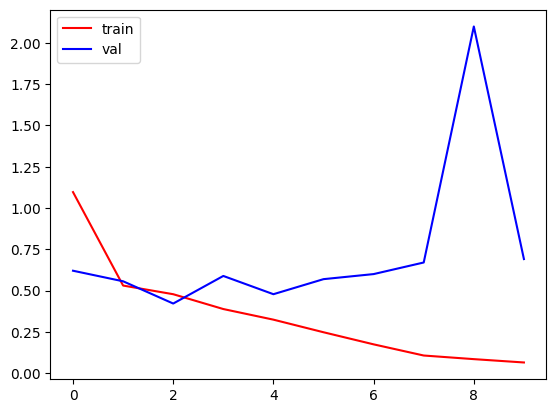

In [5]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red',label='train')
plt.plot(history.history['val_accuracy'], color = 'blue',label='validation')
plt.legend()
plt.show()

plt.plot(history.history['loss'], color = 'red',label='train')
plt.plot(history.history['val_loss'], color = 'blue',label='validation')
plt.legend(['train', 'val'])
plt.show()

In [6]:
import cv2

In [8]:
import pandas as pd

# Generate predictions for validation dataset
label = []
id = []

# Iterate through validation dataset
for idx, (images, _) in enumerate(validation_ds.unbatch().batch(1)):
    # Predict if the image is a dog (1) or not (0)
    pred = model.predict(images)
    label.append(pred[0][0])
    id.append(idx + 1)

# Create a DataFrame for predictions
df = pd.DataFrame({
    'Image_Label': id,
    'Prediction': label
})

# Save the predictions to a CSV file
df.to_csv('/content/predictions.csv', index=False)

print("Predictions saved to predictions.csv")


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 28ms/step
Predictions saved to predictions.csv


In [9]:
from google.colab import files
files.download('/content/predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>